# computer vision libraries
'torchvision.datasets' - get datasets and dataloading functions

'torchvision.models' - get pretrained computer vision models that you can leverage for your own problem

'torchvision.transform' - functions for manipulating your vision data to be suitable for use with ml model

'torch.utils.data.Dataset' - base dataet class for pytorch

'torch.utils.data.Dataloader' - creates a python iterable over a data set

In [36]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


# getting a dataset

FashionMNIST 

In [84]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download="True",
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,),(0.5,))
    ]),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download="True",
    transform=ToTensor(),
    target_transform=None
)



In [85]:
len(train_data)

60000

In [86]:
image, label = train_data[1]

In [87]:
image, label

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9922, -1.0000,
           -1.0000, -1.0000, -1.0000, -0.6784,  0.4745, -0.1922, -0.5765,
           -0.6235, -0.6627, -0.3176,  0.3176,  0.0431, -0.8745, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -0.9922, -1.0000, -1.0000, -1.0000,
           -0.6157,  0.0667,  0.7176,  0.6941,  0.7882,  0.8510,  1.0000,
            1.0000,  1.0000,  1.0000,  0.7020,  0.6863,  0.9922,  0.8118,
            0.2549, -0.6471, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.8902,  0.3804,
            0.7412,  0.7569,  0.6627,  0.5922,  0.5529,  0.5373,  0.5686,
            0.6863,  0.6000,  0.5843,  0.5765,  0.5765,  0.5765,  0.6392,
            0.7098,  0.7569,  0.2863, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000,  0.4745,  0.7176,
            0.5686,  0.5529,  0.584

In [88]:
label

0

In [89]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [90]:
image.shape

torch.Size([1, 28, 28])

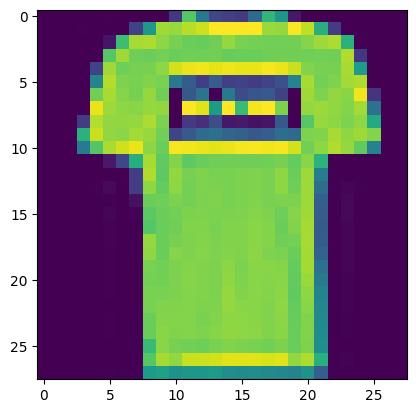

In [91]:
plt.imshow(image.squeeze())

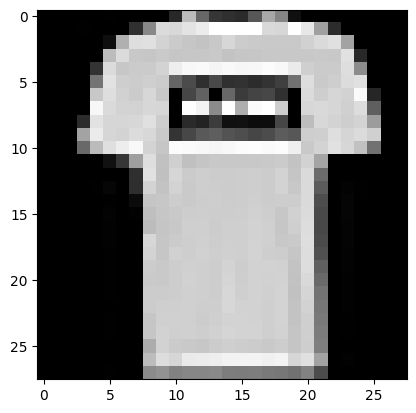

In [92]:
plt.imshow(image.squeeze(), cmap="gray")

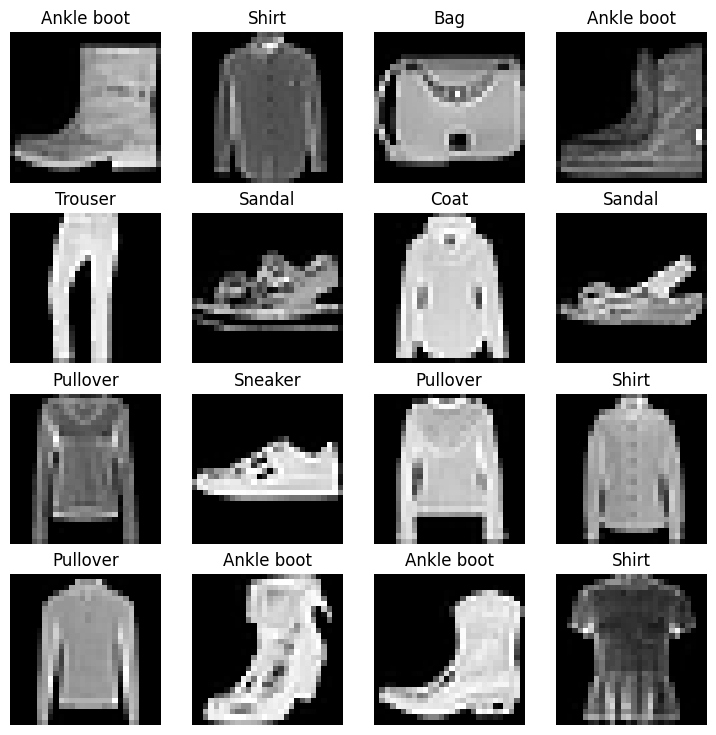

In [46]:
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_nt = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_nt]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

# prepare dataloader
we want to turn our data into batches(mini batches)

it is more efficient so we break it down to 32 images at a time (batch size of 32).

it gives neual network more chances to upgrade its gradient per epoch

In [47]:
from torch.utils.data import DataLoader


In [93]:
# create a dataloader

# setup the barch size
BATCH_SIZE = 32

# turn data into iterables
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
                              batch_size=BATCH_SIZE,
                              shuffle=True
                              )

test_dataloader = DataLoader(test_data, # dataset to turn into iterable
                              batch_size=BATCH_SIZE,
                              shuffle=False
                              )

In [49]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape 

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [50]:
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001B79E3B9210>, <torch.utils.data.dataloader.DataLoader object at 0x000001B79DE658D0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


# Build a baseline model

In [51]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x)



In [52]:
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [53]:
from torch import nn
class FashionMNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [54]:
torch.manual_seed(42)

model_0 = FashionMNISTModel(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
)

In [55]:
model_0

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [56]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [57]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer


In [58]:
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [59]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [60]:
# import tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time = timer()

# set number of epochs
epochs = 3

# create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    # TRAINING
    train_loss = 0
    train_acc = 0
    # add a loop to loop throught the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # forward pass
        y_pred = model_0(X)

        # calculate the loss per batch
        loss = loss_fn(y_pred, y)
        # accumulatively add up the loss per epoch
        # train_loss += loss

        # optimizer zero grad
        optimizer.zero_grad()

        # loss backward
        loss.backward()

        # optimizer step
        optimizer.step()

        
        train_acc /= len(train_dataloader)

        # print out how many samples have been seen
        if batch % 400 == 0:
            print(f"looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss /= len(train_dataloader)

    # TESTING
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # forward pass
            test_pred = model_0(X)

            # calculate loss
            test_loss += loss_fn(test_pred, y)  

            # calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        # calculate the test accuracy average per batch
        test_loss /= len(test_dataloader)

        # calculate the test acc average per batch
        test_acc /= len(test_dataloader) 

    print(f"\nTrain loss: {train_loss:.4f} |  | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

    # calculate the training time

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:12<00:24, 12.46s/it]


Train loss: 0.0000 |  | Test loss: 0.6290, Test acc: 78.63%
Epoch: 1
-------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:25<00:13, 13.04s/it]


Train loss: 0.0000 |  | Test loss: 0.5441, Test acc: 81.13%
Epoch: 2
-------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples


100%|██████████| 3/3 [00:38<00:00, 12.96s/it]


Train loss: 0.0000 |  | Test loss: 0.5137, Test acc: 82.00%


# make predictions and get Model0 results

In [61]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model prediction"""
    loss, acc = 0, 0
    with torch.inference_mode():
        for X, y in data_loader:
            # make predictions
            y_pred = model(X)

            # accumulate the loss and acc values per batch
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
            
            # scale loss and acc to find the average loss/acc per batch
        loss/= len(data_loader)
        acc/= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.5136752128601074,
 'model_acc': 81.9988019169329}

In [101]:
class FashionMNISTModel1(nn.Module):
    def __init__(self, input_shape: int,
                 hidden_unit: int,
                 output_shape: int):
        
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_unit),
            nn.ReLU(),
            nn.Linear(in_features=hidden_unit, out_features=output_shape),
            
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [63]:
torch.manual_seed(42)
model1 = FashionMNISTModel1(input_shape=784,
                            hidden_unit=10,
                            output_shape=len(class_names))
next(model1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)

In [103]:
loss_func = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model1.parameters(), lr=0.01)
from helper_functions import accuracy_fn


# functionizing training and evaluatio loops

In [96]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
    # performs a training with model trying to learn on data_loader
    train_loss, train_acc = 0, 0
    model.train()

    # add a loop to loop through the training batches
    for batch, (X,y) in enumerate(data_loader):
        
        # forward pass
        y_pred1 = model(X)

        loss1 = loss_fn(y_pred1, y)

        train_loss += loss1
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred1.argmax(dim=1))

       

        # optimizer zero grad
        optimizer.zero_grad()

        # loss backward
        loss1.backward()

        # optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"\nTrain loss: {train_loss:.4f} |  Train acc: {train_acc:.2f}%")

    

        






In [98]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
    
    test_loss, test_acc = 0, 0 

    model.eval()

    with torch.inference_mode():
        for X,y in data_loader:
            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y,test_pred.argmax(dim=1))
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")




In [100]:
torch.manual_seed(42)

epochs = 4

for epoch in range(epochs):
    print(f"Epoch: {epoch}\n--------------")
    train_step(model=model1,
               data_loader=train_dataloader,
               loss_fn=loss_func,
               optimizer=optim,
               accuracy_fn=accuracy_fn
               )
    
    test_step(model=model1,
              data_loader=test_dataloader,
              loss_fn=loss_func,
              optimizer=optim,
              accuracy_fn=accuracy_fn)

Epoch: 0
--------------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train loss: 0.5757 |  Train acc: 79.80%
Test loss: 0.94577 | Test acc: 67.54%

Epoch: 1
--------------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train loss: 0.5629 |  Train acc: 80.22%
Test loss: 0.96491 | Test acc: 66.56%

Epoch: 2
--------------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train loss: 0.5529 |  Train acc: 80.57%
Test loss: 0.99261 | Test acc: 65.18%

Epoch: 3
--------------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train loss: 0.5445 |  Train acc: 80.84%
Test loss: 1.00766 | Test acc: 64.82%

